In [399]:
import itertools

In [400]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sb
import pickle
coset = pd.read_csv('E:/School/FIFTH YEAR/SECOND SEMESTER/DATA SCIENCE AND ANALYTICS/Project/Baranovskiietal.2020DatasetofCOVID-19Patients_shuffled.csv')

In [401]:
coset

,Patient Identificator,"Gender: \n""0"" - Female; \n""1"" - Male","Age, years","Age >60 years: \nYes - ""1"", \nNo - ""0""","SARS-CoV-2 RT-PCR testing results: \nPositive - ""1""\nNegative - ""0""",Time between the disease onset and admission to the hospital (days),CRP upon admission (mg/L),INR upon admission,PT upon admission (sec.),Fibrinogen upon admission (mg/L),Platalet count upon admission (10^9/L),Chest CT upon admission: lung tissue affected (%),"CRP, 1 week after admission (mg/L)","Chest CT, 1 week after admission: lung tissue affected (%)","Platalet count, 1 week after admission (10^9/L)"
0,STP30,1,40,0,1,11,157.0,1.24,13.6,6.61,213,60,12.0,24,369
1,STP130,0,43,0,1,6,102.0,1.23,13.4,6.35,194,48,3.0,40,307
2,STP46,1,71,1,1,4,23.0,1.25,13.7,4.69,74,50,29.0,40,260
3,STP32,1,48,0,0,12,207.0,1.15,12.6,6.78,205,25,11.0,36,409
4,ICU12,0,43,0,0,3,16.0,1.23,13.4,NaN,242,76,132.5,80,193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,STP56,0,82,1,1,7,59.0,1.44,15.9,4.69,192,50,18.0,24,382
227,STP53,1,75,1,0,14,90.0,1.23,13.5,4.92,126,40,12.0,40,244
228,STP122,1,41,0,0,8,56.0,1.90,20.4,5.27,173,75,7.0,56,310
229,ICU89,0,56,0,1,7,161.0,1.19,13.0,5.66,148,60,25.0,80,213


In [402]:
coset.isnull().sum(axis=0)

Patient Identificator                                                   0
Gender: \n"0" - Female; \n"1" - Male                                    0
Age, years                                                              0
Age >60 years: \nYes - "1", \nNo - "0"                                  0
SARS-CoV-2 RT-PCR testing results: \nPositive - "1"\nNegative - "0"     0
Time between the disease onset and admission to the hospital (days)     0
CRP upon admission (mg/L)                                               0
INR upon admission                                                      0
PT upon admission (sec.)                                                0
Fibrinogen upon admission (mg/L)                                        1
Platalet count upon admission (10^9/L)                                  0
Chest CT upon admission: lung tissue affected (%)                       0
CRP, 1 week after admission (mg/L)                                      0
Chest CT, 1 week after admission: lung

In [403]:
coset['Fibrinogen upon admission (mg/L)'].fillna((coset['Fibrinogen upon admission (mg/L)'].mean()), inplace=True)
coset.isnull().sum(axis=0)

Patient Identificator                                                   0
Gender: \n"0" - Female; \n"1" - Male                                    0
Age, years                                                              0
Age >60 years: \nYes - "1", \nNo - "0"                                  0
SARS-CoV-2 RT-PCR testing results: \nPositive - "1"\nNegative - "0"     0
Time between the disease onset and admission to the hospital (days)     0
CRP upon admission (mg/L)                                               0
INR upon admission                                                      0
PT upon admission (sec.)                                                0
Fibrinogen upon admission (mg/L)                                        0
Platalet count upon admission (10^9/L)                                  0
Chest CT upon admission: lung tissue affected (%)                       0
CRP, 1 week after admission (mg/L)                                      0
Chest CT, 1 week after admission: lung

In [404]:
coset['Patient Identificator'] = coset['Patient Identificator'].apply(lambda x: 1 if 'ICU' in x else 0)
coset

,Patient Identificator,"Gender: \n""0"" - Female; \n""1"" - Male","Age, years","Age >60 years: \nYes - ""1"", \nNo - ""0""","SARS-CoV-2 RT-PCR testing results: \nPositive - ""1""\nNegative - ""0""",Time between the disease onset and admission to the hospital (days),CRP upon admission (mg/L),INR upon admission,PT upon admission (sec.),Fibrinogen upon admission (mg/L),Platalet count upon admission (10^9/L),Chest CT upon admission: lung tissue affected (%),"CRP, 1 week after admission (mg/L)","Chest CT, 1 week after admission: lung tissue affected (%)","Platalet count, 1 week after admission (10^9/L)"
0,0,1,40,0,1,11,157.0,1.24,13.6,6.610000,213,60,12.0,24,369
1,0,0,43,0,1,6,102.0,1.23,13.4,6.350000,194,48,3.0,40,307
2,0,1,71,1,1,4,23.0,1.25,13.7,4.690000,74,50,29.0,40,260
3,0,1,48,0,0,12,207.0,1.15,12.6,6.780000,205,25,11.0,36,409
4,1,0,43,0,0,3,16.0,1.23,13.4,4.917783,242,76,132.5,80,193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,0,0,82,1,1,7,59.0,1.44,15.9,4.690000,192,50,18.0,24,382
227,0,1,75,1,0,14,90.0,1.23,13.5,4.920000,126,40,12.0,40,244
228,0,1,41,0,0,8,56.0,1.90,20.4,5.270000,173,75,7.0,56,310
229,1,0,56,0,1,7,161.0,1.19,13.0,5.660000,148,60,25.0,80,213


In [405]:
coset.describe()

,Patient Identificator,"Gender: \n""0"" - Female; \n""1"" - Male","Age, years","Age >60 years: \nYes - ""1"", \nNo - ""0""","SARS-CoV-2 RT-PCR testing results: \nPositive - ""1""\nNegative - ""0""",Time between the disease onset and admission to the hospital (days),CRP upon admission (mg/L),INR upon admission,PT upon admission (sec.),Fibrinogen upon admission (mg/L),Platalet count upon admission (10^9/L),Chest CT upon admission: lung tissue affected (%),"CRP, 1 week after admission (mg/L)","Chest CT, 1 week after admission: lung tissue affected (%)","Platalet count, 1 week after admission (10^9/L)"
count,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000
mean,0.432900,0.567100,58.385281,0.463203,0.675325,8.597403,97.032468,1.273377,13.911688,4.917783,182.653680,52.445887,66.060606,55.389610,260.212121
std,0.496553,0.496553,15.119626,0.499727,0.469270,6.471193,67.209132,0.151177,1.643510,1.172767,75.176381,16.546256,71.123275,24.471362,96.829716
min,0.000000,0.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.980000,10.700000,1.240000,38.000000,10.000000,0.000000,0.000000,14.000000
25%,0.000000,0.000000,48.000000,0.000000,0.000000,5.000000,40.500000,1.170000,12.900000,4.455000,129.000000,40.000000,6.000000,36.000000,193.000000
50%,0.000000,1.000000,59.000000,0.000000,1.000000,7.000000,86.000000,1.240000,13.500000,4.770000,170.000000,50.000000,27.000000,52.000000,248.000000
75%,1.000000,1.000000,69.000000,1.000000,1.000000,10.000000,156.000000,1.345000,14.700000,5.230000,219.000000,60.000000,132.500000,80.000000,325.500000
max,1.000000,1.000000,94.000000,1.000000,1.000000,50.000000,328.000000,1.920000,20.600000,11.480000,493.000000,92.000000,323.000000,100.000000,547.000000


In [406]:
columns = list(coset.columns)

from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import numpy as np
# imputer = KNNImputer(n_neighbors=5)
# data = imputer.fit_transform(coset)
scaler = MinMaxScaler()
scaler.fit(coset)
normalized = scaler.transform(coset)
#normalized = preprocessing.normalize(scaler.transform(data))
# print(scaler.transform(data))
data = pd.DataFrame(normalized,columns=columns)
data

,Patient Identificator,"Gender: \n""0"" - Female; \n""1"" - Male","Age, years","Age >60 years: \nYes - ""1"", \nNo - ""0""","SARS-CoV-2 RT-PCR testing results: \nPositive - ""1""\nNegative - ""0""",Time between the disease onset and admission to the hospital (days),CRP upon admission (mg/L),INR upon admission,PT upon admission (sec.),Fibrinogen upon admission (mg/L),Platalet count upon admission (10^9/L),Chest CT upon admission: lung tissue affected (%),"CRP, 1 week after admission (mg/L)","Chest CT, 1 week after admission: lung tissue affected (%)","Platalet count, 1 week after admission (10^9/L)"
0,0.0,1.0,0.270270,0.0,1.0,0.204082,0.477064,0.276596,0.292929,0.524414,0.384615,0.609756,0.037152,0.24,0.666041
1,0.0,0.0,0.310811,0.0,1.0,0.102041,0.308869,0.265957,0.272727,0.499023,0.342857,0.463415,0.009288,0.40,0.549719
2,0.0,1.0,0.689189,1.0,1.0,0.061224,0.067278,0.287234,0.303030,0.336914,0.079121,0.487805,0.089783,0.40,0.461538
3,0.0,1.0,0.378378,0.0,0.0,0.224490,0.629969,0.180851,0.191919,0.541016,0.367033,0.182927,0.034056,0.36,0.741088
4,1.0,0.0,0.310811,0.0,0.0,0.040816,0.045872,0.265957,0.272727,0.359158,0.448352,0.804878,0.410217,0.80,0.335835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,0.0,0.0,0.837838,1.0,1.0,0.122449,0.177370,0.489362,0.525253,0.336914,0.338462,0.487805,0.055728,0.24,0.690432
227,0.0,1.0,0.743243,1.0,0.0,0.265306,0.272171,0.265957,0.282828,0.359375,0.193407,0.365854,0.037152,0.40,0.431520
228,0.0,1.0,0.283784,0.0,0.0,0.142857,0.168196,0.978723,0.979798,0.393555,0.296703,0.792683,0.021672,0.56,0.555347
229,1.0,0.0,0.486486,0.0,1.0,0.122449,0.489297,0.223404,0.232323,0.431641,0.241758,0.609756,0.077399,0.80,0.373358


In [407]:
data.isnull().sum(axis=0)

Patient Identificator                                                   0
Gender: \n"0" - Female; \n"1" - Male                                    0
Age, years                                                              0
Age >60 years: \nYes - "1", \nNo - "0"                                  0
SARS-CoV-2 RT-PCR testing results: \nPositive - "1"\nNegative - "0"     0
Time between the disease onset and admission to the hospital (days)     0
CRP upon admission (mg/L)                                               0
INR upon admission                                                      0
PT upon admission (sec.)                                                0
Fibrinogen upon admission (mg/L)                                        0
Platalet count upon admission (10^9/L)                                  0
Chest CT upon admission: lung tissue affected (%)                       0
CRP, 1 week after admission (mg/L)                                      0
Chest CT, 1 week after admission: lung

In [408]:
print(data.corrwith(data['Patient Identificator'],method='pearson'))

Patient Identificator                                                   1.000000
Gender: \n"0" - Female; \n"1" - Male                                    0.005115
Age, years                                                              0.187328
Age >60 years: \nYes - "1", \nNo - "0"                                  0.134560
SARS-CoV-2 RT-PCR testing results: \nPositive - "1"\nNegative - "0"     0.269947
Time between the disease onset and admission to the hospital (days)    -0.091658
CRP upon admission (mg/L)                                               0.340781
INR upon admission                                                      0.207485
PT upon admission (sec.)                                                0.210075
Fibrinogen upon admission (mg/L)                                       -0.064585
Platalet count upon admission (10^9/L)                                 -0.005401
Chest CT upon admission: lung tissue affected (%)                       0.396047
CRP, 1 week after admission 

[Text(0, 0.5, 'Patient Identificator'),
 Text(0, 1.5, 'Gender: \n"0" - Female; \n"1" - Male'),
 Text(0, 2.5, 'Age, years'),
 Text(0, 3.5, 'Age >60 years: \nYes - "1", \nNo - "0"'),
 Text(0, 4.5, 'SARS-CoV-2 RT-PCR testing results: \nPositive - "1"\nNegative - "0" '),
 Text(0, 5.5, 'Time between the disease onset and admission to the hospital (days)'),
 Text(0, 6.5, 'CRP upon admission (mg/L)'),
 Text(0, 7.5, 'INR upon admission'),
 Text(0, 8.5, 'PT upon admission (sec.)'),
 Text(0, 9.5, 'Fibrinogen upon admission (mg/L)'),
 Text(0, 10.5, 'Platalet count upon admission (10^9/L)'),
 Text(0, 11.5, 'Chest CT upon admission: lung tissue affected (%)'),
 Text(0, 12.5, 'CRP, 1 week after admission (mg/L)'),
 Text(0, 13.5, 'Chest CT, 1 week after admission: lung tissue affected (%)'),
 Text(0, 14.5, 'Platalet count, 1 week after admission (10^9/L)')]

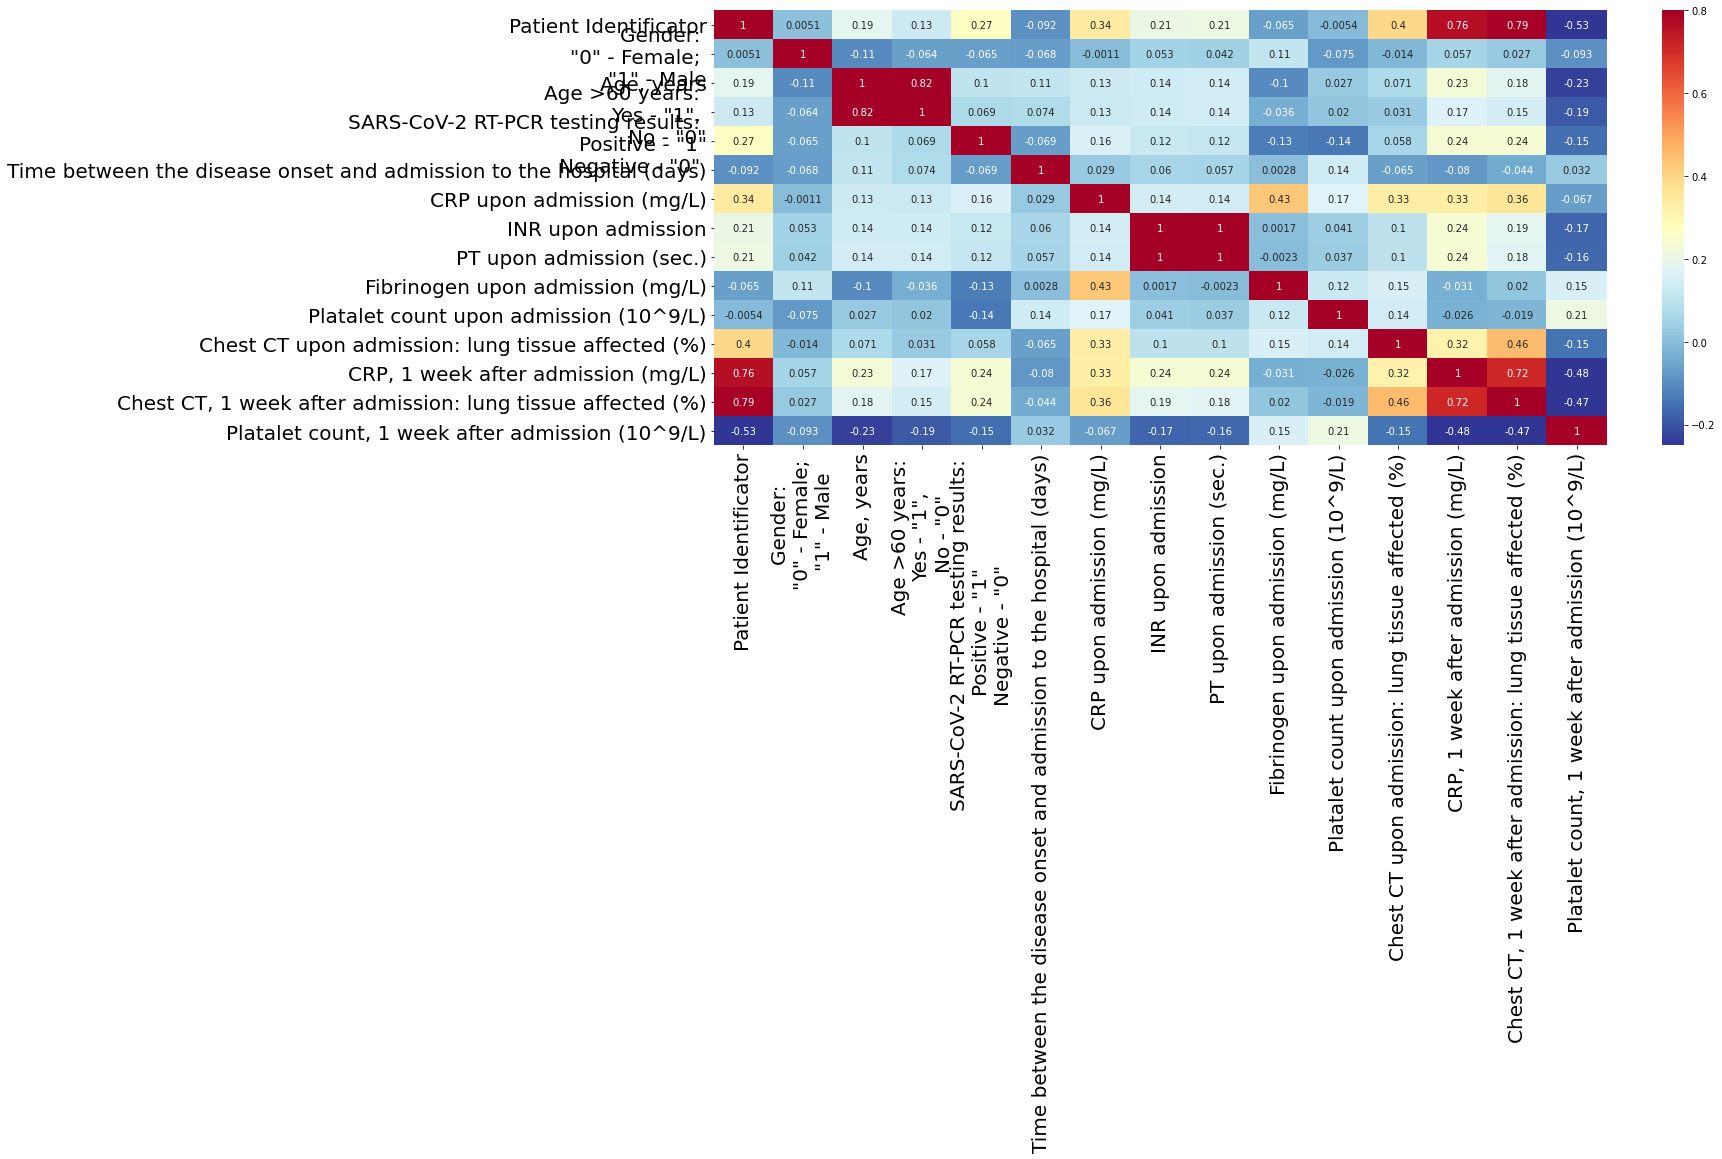

In [409]:
#Checking the correlation coefficient
copy_data = data
# counter = 0
# for col in copy_data.columns:
#     copy_data = copy_data.rename({col: counter}, axis=1)  # new method
#     counter = counter + 1
# copy_data
correlations = copy_data.corr(method='pearson')
#Ploting a heatmap of the above coefficient values
plt.figure(figsize = (20, 8))

res = sb.heatmap(correlations, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.8, linewidth=0)
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 20)
res.set_yticklabels(res.get_xmajorticklabels(), fontsize = 20)

In [410]:
X = data.drop(columns=['Patient Identificator'])
y = data['Patient Identificator']

In [411]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline

0.0    131
1.0    100
Name: Patient Identificator, dtype: int64


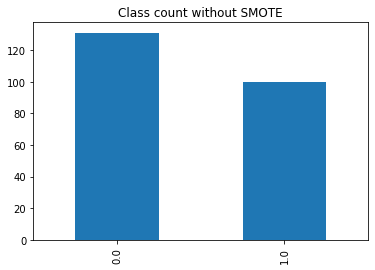

In [412]:
y.value_counts().plot(kind='bar', title='Class count without SMOTE',y=['Yes','No'])
print(y.value_counts())

1.0    131
0.0    131
Name: Patient Identificator, dtype: int64


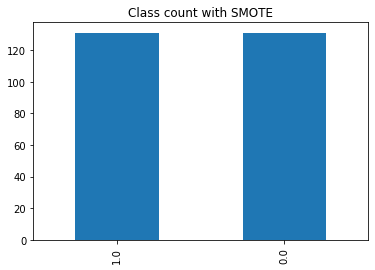

In [413]:
smote = SMOTE(random_state = 11)
X_smote, y_smote = smote.fit_resample(X, y)
y_smote.value_counts().plot(kind='bar', title='Class count with SMOTE')
print(y_smote.value_counts())

In [414]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SequentialFeatureSelector

In [415]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, cohen_kappa_score, f1_score, recall_score, precision_score
def measures(predicted, y_test,name):
    accuracy = accuracy_score(y_test, predicted)
    print('Accuracy: %f' % accuracy)
    precision = precision_score(y_test, predicted)
    print('Precision: %f' % precision)
    recall = recall_score(y_test, predicted)
    print('Recall: %f' % recall)
    f1 = f1_score(y_test, predicted)
    print('F1 score: %f' % f1)
    kappa = cohen_kappa_score(y_test, predicted)
    print('Cohens kappa: %f' % kappa)
    auc = roc_auc_score(y_test, predicted)
    print('ROC AUC: %f' % auc)
    matrix = confusion_matrix(y_test, predicted)
    print('Confusion Matrix')
    #print(matrix)
    plot_confusion_matrix(predicted, y_test,name)

In [416]:
def val_croc_predict(model,X_os,y_os):
    #RUN THIS PART
    from sklearn.metrics import auc
    from sklearn.metrics import RocCurveDisplay

    cv = kf
    
    sfs = SequentialFeatureSelector(model, direction='forward', cv=kf, n_jobs=-1)
    sfs.fit(X_os, y_os)
    sfs.get_feature_names_out()
    print()
    print(model)
    print("Features selected for "+model.__class__.__name__+": ")
    print(sfs.get_feature_names_out())    
    print()
    X_os = X_os[list(sfs.get_feature_names_out())]
    
    preds=cross_val_predict(model, X_os,y_os,cv=kf,n_jobs=-1)
    measures(preds,y_os,model.__class__.__name__)
    X_os = X_os[list(sfs.get_feature_names_out())].values
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots()
    for i, (train, test) in enumerate(cv.split(X_os,y_os)):
        model.fit(X_os[train], y_os[train])
        viz = RocCurveDisplay.from_estimator(
            model,
            X_os[test],
            y_os[test],
            name="ROC fold {}".format(i),
            alpha=0.3,
            lw=1,
            ax=ax,
        )
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(
        mean_fpr,
        mean_tpr,
        color="b",
        label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
        lw=2,
        alpha=0.8,
    )

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(
        mean_fpr,
        tprs_lower,
        tprs_upper,
        color="grey",
        alpha=0.2,
        label=r"$\pm$ 1 std. dev.",
    )

    ax.set(
        xlim=[-0.05, 1.05],
        ylim=[-0.05, 1.05],
        title="Receiver operating characteristic for "+model.__class__.__name__,
    )
    ax.legend(loc="lower right")
    plt.show()

In [417]:
models = []

In [418]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
kf = StratifiedKFold(n_splits=10)

In [419]:
def plot_confusion_matrix(predicted, y_test,name):
    cnf_matrix = confusion_matrix(y_test, predicted)
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    generate_confusion_matrix(cnf_matrix, classes='Description', title=name+"'s Confusion matrix")
    plt.show()
    
def generate_confusion_matrix(cnf_matrix, classes, normalize=False, title='Confusion matrix'):

    plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    
    plt.xticks([True,False],['ICU','non-ICU'])
    plt.yticks([True,False],['ICU','non-ICU'])
    
    fmt = '.2f' if normalize else 'd'
    thresh = cnf_matrix.max() / 2.

    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, format(cnf_matrix[i, j], fmt), horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel(' True label')
    plt.xlabel('Predicted label')

    return cnf_matrix


In [420]:
param = { 
  'n_neighbors' : [5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39],
  'metric' : ['minkowski','euclidean','manhattan'],
  #'leaf_size' : [10,20,30,40,50],
  #'algorithm': ['auto','ball_tree','kd_tree','brute']
          }
knn = KNeighborsClassifier()
knn_GS= GridSearchCV(estimator=knn,
                     param_grid = param,
                     scoring=["accuracy", "recall"],
                     refit="accuracy",
                     verbose= 4,
                     cv=kf,
                     n_jobs=-1)

Fitting 10 folds for each of 54 candidates, totalling 540 fits
------------BEFORE SMOTE------------
KNeighborsClassifier(metric='manhattan', n_neighbors=15)
Accuracy: 0.922078
Precision: 0.965909
Recall: 0.850000
F1 score: 0.904255
Cohens kappa: 0.839012
ROC AUC: 0.913550
Confusion Matrix


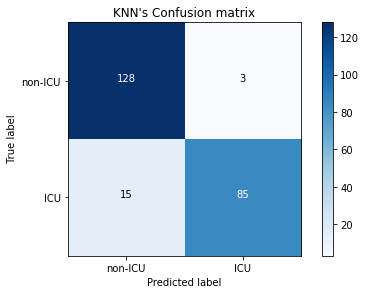

In [421]:
knn_GS.fit(X, y)
model = knn_GS.best_estimator_
models.append(model)
preds = cross_val_predict(knn_GS.best_estimator_, X, y, cv=kf, n_jobs=-1,)
print("------------BEFORE SMOTE------------")
print(model)
measures(preds, y,"KNN")

Fitting 10 folds for each of 54 candidates, totalling 540 fits
------------AFTER SMOTE------------
KNeighborsClassifier(metric='manhattan', n_neighbors=9)
Accuracy: 0.927481
Precision: 0.944444
Recall: 0.908397
F1 score: 0.926070
Cohens kappa: 0.854962
ROC AUC: 0.927481
Confusion Matrix


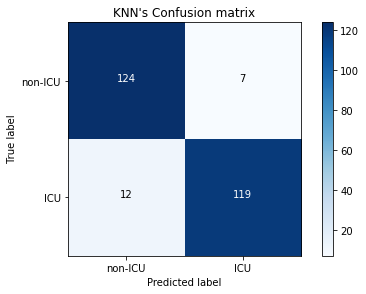

In [422]:
knn_GS.fit(X_smote, y_smote)
model = knn_GS.best_estimator_
models.append(model)
preds = cross_val_predict(knn_GS.best_estimator_, X_smote, y_smote, cv=kf, n_jobs=-1,)
print("------------AFTER SMOTE------------")
print(model)
measures(preds, y_smote,"KNN")

In [423]:
#SVM before SMOTE
svm = SVC()
svm_search_param = {
  #'random_state':[0,1],
  'C':[1,2,3,4,5,6,7,8,9,10,15,20,25,30],
  'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
  'kernel':['rbf','sigmoid','linear']
}
svm_GS = GridSearchCV(estimator=svm,
                     param_grid = svm_search_param,
                     scoring=["accuracy", "recall"],
                     refit="accuracy",
                     verbose= 4,
                     cv=kf,
                     n_jobs=-1)

Fitting 10 folds for each of 210 candidates, totalling 2100 fits
------------BEFORE SMOTE------------
SVC(C=8, gamma=0.01)
Accuracy: 0.943723
Precision: 0.967742
Recall: 0.900000
F1 score: 0.932642
Cohens kappa: 0.884424
ROC AUC: 0.938550
Confusion Matrix


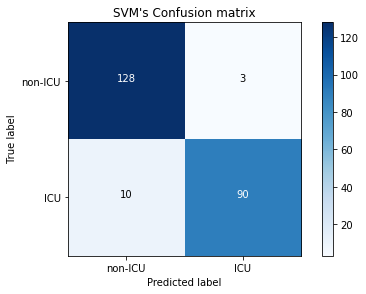

In [424]:
svm_GS.fit(X,y)
model = svm_GS.best_estimator_
models.append(model)
preds = cross_val_predict(svm_GS.best_estimator_, X, y, cv=kf, n_jobs=-1,)
print("------------BEFORE SMOTE------------")
print(model)
measures(preds, y,"SVM")

Fitting 10 folds for each of 210 candidates, totalling 2100 fits
------------AFTER SMOTE------------
SVC(C=2, gamma=0.1)
Accuracy: 0.938931
Precision: 0.952756
Recall: 0.923664
F1 score: 0.937984
Cohens kappa: 0.877863
ROC AUC: 0.938931
Confusion Matrix


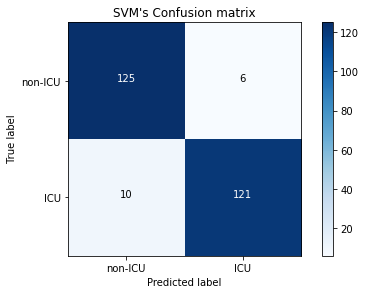

In [425]:
svm_GS.fit(X_smote,y_smote)
model = svm_GS.best_estimator_
models.append(model)
preds = cross_val_predict(svm_GS.best_estimator_, X_smote, y_smote, cv=kf, n_jobs=-1,)
print("------------AFTER SMOTE------------")
print(model)
measures(preds, y_smote,"SVM")

In [426]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc_search_param= {
    "n_estimators" : [100, 200, 400, 1000],
    #"criterion" : ["gini", "entropy"],
    "max_depth" : [None, 10, 50, 100, 200, 300, 400],
    #"max_features" : ["auto", "sqrt", "log2"]
    
}
etc_GS = GridSearchCV(estimator=etc,
                     param_grid = etc_search_param,
                     scoring=["accuracy", "recall"],
                     refit="accuracy",
                     verbose= 4,
                     cv=kf,
                     n_jobs=-1)

Fitting 10 folds for each of 28 candidates, totalling 280 fits
------------BEFORE SMOTE------------
ExtraTreesClassifier(max_depth=10, n_estimators=200)
Accuracy: 0.935065
Precision: 0.947368
Recall: 0.900000
F1 score: 0.923077
Cohens kappa: 0.866961
ROC AUC: 0.930916
Confusion Matrix


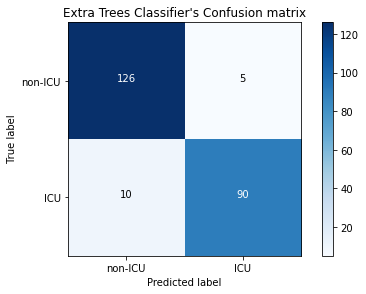

In [427]:
etc_GS.fit(X,y)
model = etc_GS.best_estimator_
models.append(model)
preds = cross_val_predict(etc_GS.best_estimator_, X, y, cv=kf, n_jobs=-1,);
print("------------BEFORE SMOTE------------")
print(model);
measures(preds, y,"Extra Trees Classifier")

Fitting 10 folds for each of 28 candidates, totalling 280 fits
------------AFTER SMOTE------------
ExtraTreesClassifier(max_depth=50)
Accuracy: 0.965649
Precision: 0.976562
Recall: 0.954198
F1 score: 0.965251
Cohens kappa: 0.931298
ROC AUC: 0.965649
Confusion Matrix


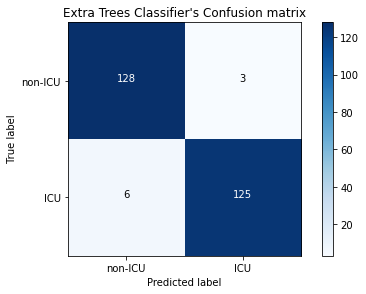

In [428]:
etc_GS.fit(X_smote,y_smote)
model = etc_GS.best_estimator_
models.append(model)
preds = cross_val_predict(etc_GS.best_estimator_, X_smote, y_smote, cv=kf, n_jobs=-1,);
print("------------AFTER SMOTE------------")
print(model);
measures(preds, y_smote,"Extra Trees Classifier")

In [429]:
#RF before SMOTE
# rf = RandomForestClassifier()
# rf_search_param = {
#   'n_estimators':[50,100,150,200],
#   'criterion':['gini','entropy'],
#   'max_features': ['auto', 'sqrt', 'log2'],
#   'bootstrap':[True,False]
# }
# rf_GS = GridSearchCV(estimator=rf,
#                      param_grid = rf_search_param,
#                      scoring=["accuracy", "recall"],
#                      refit="accuracy",
#                      verbose= 4,
#                      cv=kf,
#                      n_jobs=-1)

In [430]:
# rf_GS.fit(X,y)
# model = rf_GS.best_estimator_
# models.append(model)
# preds = cross_val_predict(rf_GS.best_estimator_, X, y, cv=kf, n_jobs=-1,);
# print("------------BEFORE SMOTE------------")
# print(model);
# measures(preds, y)

In [431]:
# rf_GS.fit(X_smote,y_smote)
# model = rf_GS.best_estimator_
# models.append(model)
# preds = cross_val_predict(rf_GS.best_estimator_, X_smote, y_smote, cv=kf, n_jobs=-1,);
# print("------------AFTER SMOTE------------")
# print(model);
# measures(preds, y_smote)

In [432]:
#models.pop(0)

In [433]:
for model in models:
    print(model)

KNeighborsClassifier(metric='manhattan', n_neighbors=15)
KNeighborsClassifier(metric='manhattan', n_neighbors=9)
SVC(C=8, gamma=0.01)
SVC(C=2, gamma=0.1)
ExtraTreesClassifier(max_depth=10, n_estimators=200)
ExtraTreesClassifier(max_depth=50)


KNeighborsClassifier BEFORE SMOTE

KNeighborsClassifier(metric='manhattan', n_neighbors=15)
Features selected for KNeighborsClassifier: 
['Gender: \n"0" - Female; \n"1" - Male' 'Age, years'
 'Age >60 years: \nYes - "1", \nNo - "0"'
 'Time between the disease onset and admission to the hospital (days)'
 'CRP, 1 week after admission (mg/L)'
 'Chest CT, 1 week after admission: lung tissue affected (%)'
 'Platalet count, 1 week after admission (10^9/L)']

Accuracy: 0.935065
Precision: 0.956989
Recall: 0.890000
F1 score: 0.922280
Cohens kappa: 0.866644
ROC AUC: 0.929733
Confusion Matrix


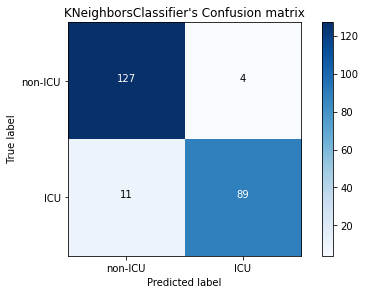

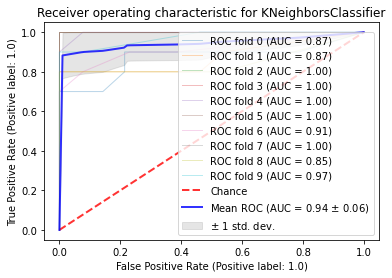

KNeighborsClassifier AFTER SMOTE

KNeighborsClassifier(metric='manhattan', n_neighbors=9)
Features selected for KNeighborsClassifier: 
['CRP upon admission (mg/L)' 'Fibrinogen upon admission (mg/L)'
 'Platalet count upon admission (10^9/L)'
 'Chest CT upon admission: lung tissue affected (%)'
 'CRP, 1 week after admission (mg/L)'
 'Chest CT, 1 week after admission: lung tissue affected (%)'
 'Platalet count, 1 week after admission (10^9/L)']

Accuracy: 0.946565
Precision: 0.975610
Recall: 0.916031
F1 score: 0.944882
Cohens kappa: 0.893130
ROC AUC: 0.946565
Confusion Matrix


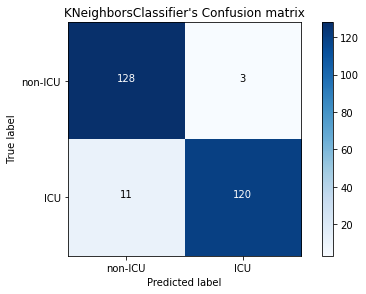

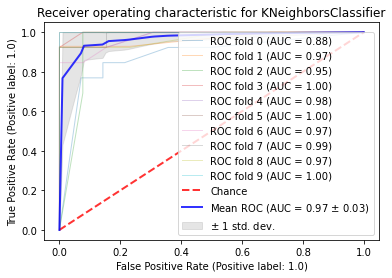

SVC BEFORE SMOTE

SVC(C=8, gamma=0.01)
Features selected for SVC: 
['Gender: \n"0" - Female; \n"1" - Male'
 'Age >60 years: \nYes - "1", \nNo - "0"'
 'Time between the disease onset and admission to the hospital (days)'
 'INR upon admission' 'CRP, 1 week after admission (mg/L)'
 'Chest CT, 1 week after admission: lung tissue affected (%)'
 'Platalet count, 1 week after admission (10^9/L)']

Accuracy: 0.943723
Precision: 0.967742
Recall: 0.900000
F1 score: 0.932642
Cohens kappa: 0.884424
ROC AUC: 0.938550
Confusion Matrix


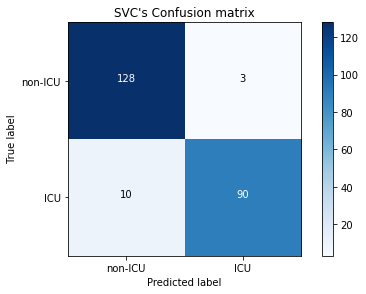

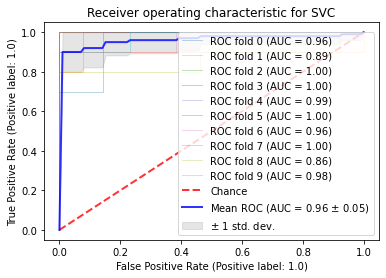

SVC AFTER SMOTE

SVC(C=2, gamma=0.1)
Features selected for SVC: 
['Gender: \n"0" - Female; \n"1" - Male' 'Age, years'
 'Age >60 years: \nYes - "1", \nNo - "0"'
 'SARS-CoV-2 RT-PCR testing results: \nPositive - "1"\nNegative - "0" '
 'CRP, 1 week after admission (mg/L)'
 'Chest CT, 1 week after admission: lung tissue affected (%)'
 'Platalet count, 1 week after admission (10^9/L)']

Accuracy: 0.946565
Precision: 0.975610
Recall: 0.916031
F1 score: 0.944882
Cohens kappa: 0.893130
ROC AUC: 0.946565
Confusion Matrix


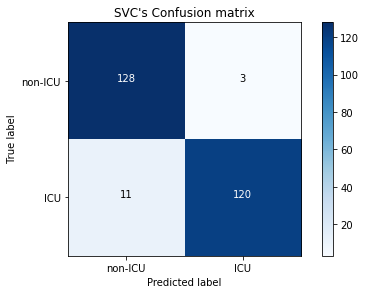

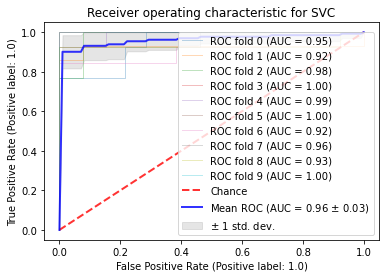

ExtraTreesClassifier BEFORE SMOTE

ExtraTreesClassifier(max_depth=10, n_estimators=200)
Features selected for ExtraTreesClassifier: 
['Gender: \n"0" - Female; \n"1" - Male'
 'Age >60 years: \nYes - "1", \nNo - "0"' 'CRP upon admission (mg/L)'
 'INR upon admission' 'Platalet count upon admission (10^9/L)'
 'Chest CT, 1 week after admission: lung tissue affected (%)'
 'Platalet count, 1 week after admission (10^9/L)']

Accuracy: 0.948052
Precision: 0.978261
Recall: 0.900000
F1 score: 0.937500
Cohens kappa: 0.893187
ROC AUC: 0.942366
Confusion Matrix


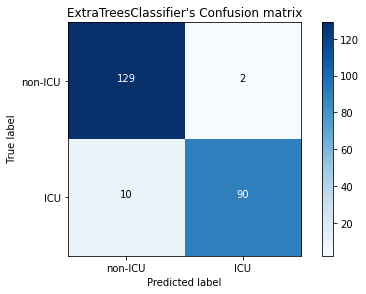

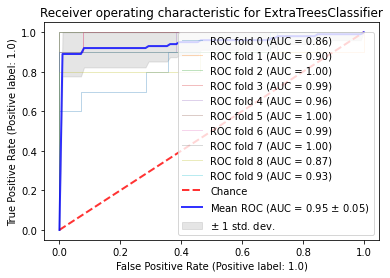

ExtraTreesClassifier AFTER SMOTE

ExtraTreesClassifier(max_depth=50)
Features selected for ExtraTreesClassifier: 
['Age, years'
 'Time between the disease onset and admission to the hospital (days)'
 'CRP upon admission (mg/L)' 'Fibrinogen upon admission (mg/L)'
 'Chest CT upon admission: lung tissue affected (%)'
 'CRP, 1 week after admission (mg/L)'
 'Chest CT, 1 week after admission: lung tissue affected (%)']

Accuracy: 0.961832
Precision: 0.968992
Recall: 0.954198
F1 score: 0.961538
Cohens kappa: 0.923664
ROC AUC: 0.961832
Confusion Matrix


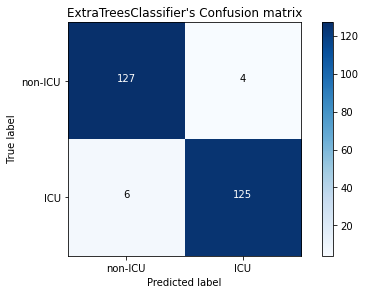

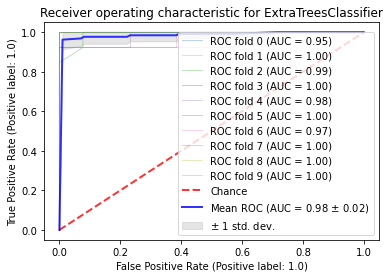

In [434]:
# models = [
#     MLPClassifier(hidden_layer_sizes=200, max_iter=1000),
#     MLPClassifier(hidden_layer_sizes=100, learning_rate='adaptive', max_iter=800),
#     KNeighborsClassifier(leaf_size=10, metric='manhattan', n_neighbors=39),
#     KNeighborsClassifier(leaf_size=10, metric='manhattan', n_neighbors=7),
#     SVC(C=1, gamma=0.0001, random_state=0),
#     SVC(C=2, gamma=0.0001, random_state=0),
#     ExtraTreesClassifier(max_depth=10, max_features='log2'),
#     ExtraTreesClassifier(n_estimators=400)
# ]

for idx, model in enumerate(models):
    if idx%2 == 0:
        print(model.__class__.__name__+" BEFORE SMOTE")
        val_croc_predict(model,X,y)
    else:
        print(model.__class__.__name__+" AFTER SMOTE")
        val_croc_predict(model,X_smote,y_smote)